#  Porto Seguro's Safe Driver Prediction

# Interactive Porto Insights - A Plot.ly Tutorial

### Loading Packages and Data

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [22]:
train = pd.read_csv('data/porto_train.csv')
print(train.shape)
train.head()

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


# Data Quality checks

Null or Missing values check

In [23]:
train.isnull().sum().sum()

# train.isnull().any().any()

0

In [24]:
train_copy = train
train_copy = train_copy.replace(-1, np.nan)

<AxesSubplot:>

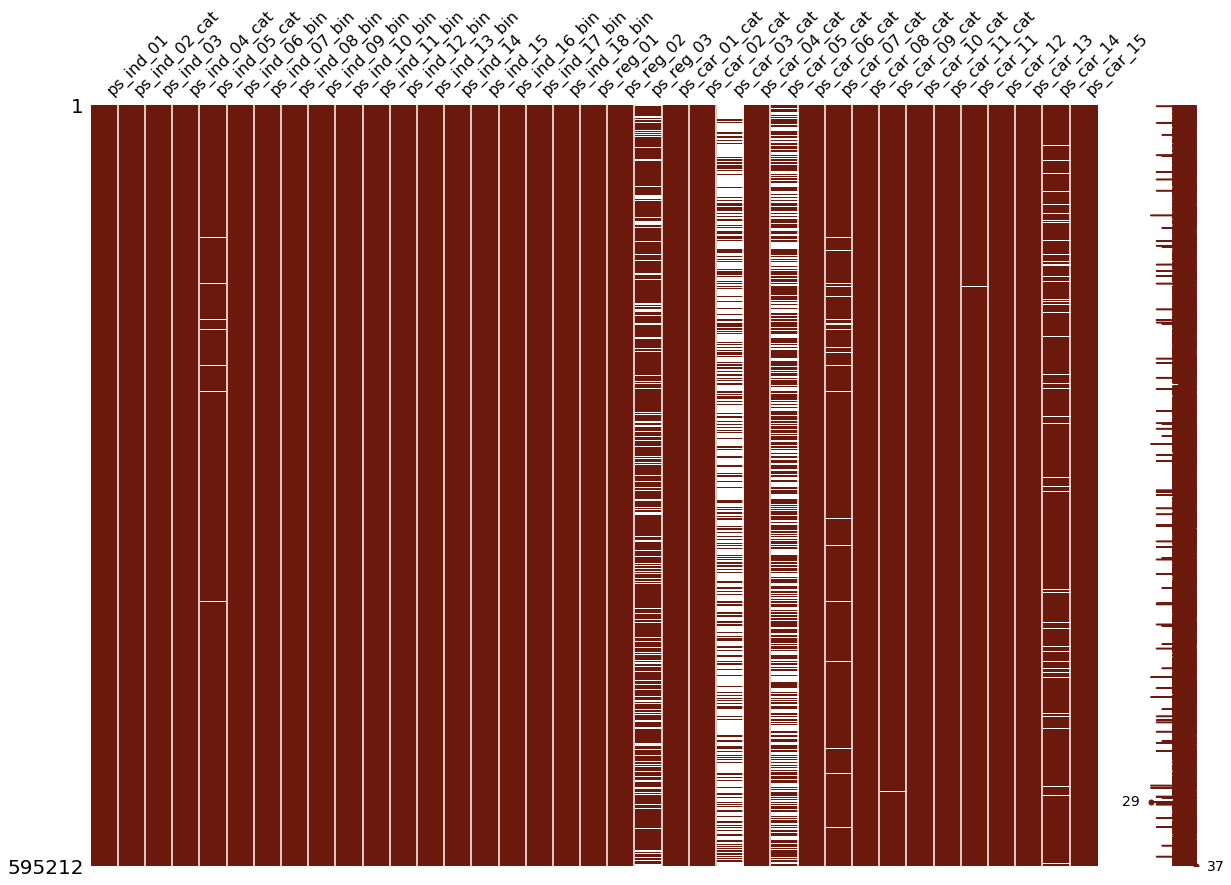

In [25]:
import missingno as msno

msno.matrix(df = train_copy.iloc[:,2:39], figsize = (20,14), color = (0.42, 0.1, 0.05))

Missingno is a most useful and convenient toll in visualizing missing value

In [26]:
# 혼자함
missing = train_copy.isnull().sum()
missing_index = missing[missing > 0].index

print('Columns which contain missing value: {0}: '.format(list(missing_index)))
# train_copy[missing_index]

Columns which contain missing value: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14']: 


In [27]:
data = [go.Bar(x = train['target'].value_counts().index.values,
              y = train['target'].value_counts().values,
              text = 'Distribution of target variable')]

layout = go.Layout(title = 'Target variable distribution')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'basic-bar')

0과 1이 불균형적으로 이루어져 있다.

In [28]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

In [29]:
train_float = train.select_dtypes(include = ['float64'])
train_int = train.select_dtypes(include = ['int64'])

### Correlation of float features

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

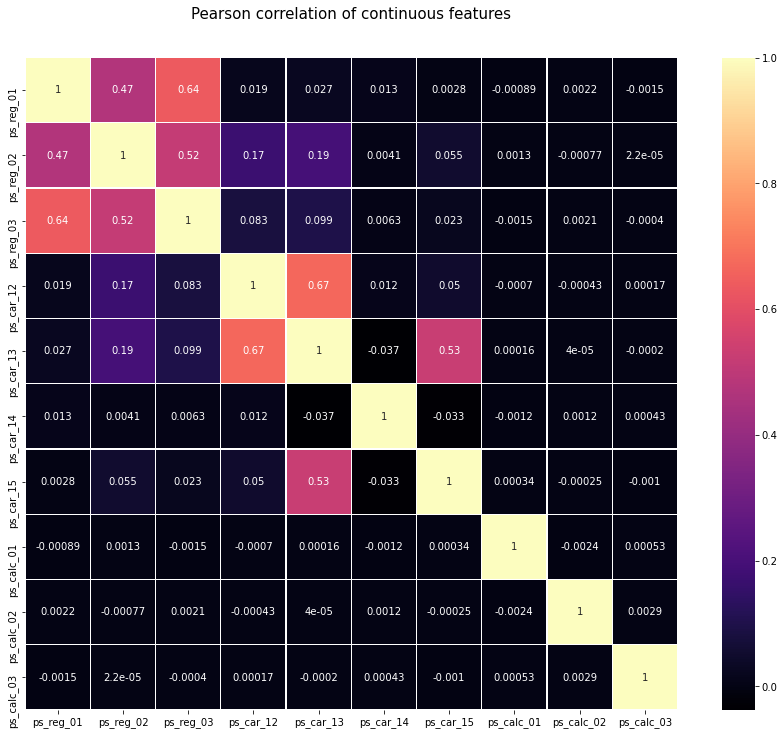

In [30]:
colormap = plt.cm.magma
plt.figure(figsize = (16,12))
plt.title('Pearson correlation of continuous features', y = 1.05, size = 15)
sns.heatmap(train_float.corr(), linewidth = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

- ps_reg_01, ps_reg_03
- ps_reg_02, ps_reg_03
- ps_car_12, ps_car_13
- ps_car_13, ps_car_15

### Correlation of integer features

In [31]:
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0)
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


In [32]:
mf = mutual_info_classif(train_float.values, train['target'].values, n_neighbors=3, random_state = 17)
print(mf)

[0.01402035 0.00431986 0.0055185  0.00778454 0.00157233 0.00197537
 0.01226    0.00553038 0.00545101 0.00562139]


### Binary features inspection

In [33]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []

for col in bin_col:
    zero_list.append((train[col] == 0).sum())
    one_list.append((train[col] == 1).sum())

In [34]:
bin_col

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [35]:
trace1 = go.Bar(
        x = bin_col, 
        y = zero_list, 
        name = 'Zero count')

trace2 = go.Bar(
        x =bin_col, 
        y = one_list, 
        name = 'One count')

data = [trace1, trace2]

layout = go.Layout(
    barmode = 'stack',
    title = 'Count of 1 and 0 in binary variables')

fig = go.Figure(data = data, layout=layout)
py.iplot(fig, filename = 'stacked-bar')

### Categorical and Ordinal feature inspection

In [36]:
from sklearn.ensemble import RandomForestClassifier

y_target = train['target']
X_features = train.drop(['id', 'target'], axis = 1)

rf = RandomForestClassifier(n_estimators=150, max_depth= 8, min_samples_leaf=4, max_features=2, n_jobs = -1, random_state = 0)
rf.fit(X_features, y_target)

features = train.drop(['id', 'target'], axis = 1).columns.values
print('------Training Done-------')

------Training Done-------


### Plot.ly Scatter Plot of feature importance

In [37]:
trace = go.Scatter( y = rf.feature_importances_,
                   x = features,
                   mode = 'markers',
                   marker = dict(
                   sizemode = 'diameter',
                   sizeref = 1,
                   size = 13,
                   color = rf.feature_importances_,
                   colorscale = 'Portland',
                   showscale = True),
                   text = features)

data = [trace]

layout = go.Layout(autosize=True,
                  title = 'Random Forest feature Importance',
                  hovermode = 'closest',
                  xaxis = dict(
                      ticklen = 5,
                      showgrid = False,
                      zeroline = False,
                      showline = False),
                  yaxis = dict(
                      title = 'Feature Importance',
                      showgrid = False,
                      zeroline = False,
                      ticklen = 5,
                      gridwidth = 2),
                  showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter 2010')

In [38]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features),
                                  reverse = False)))

trace2 = go.Bar(
    x = x,
    y = y,
    marker = dict(
        color = x, 
        colorscale = 'Viridis', 
        reversescale = True),
    name = 'Random Forest Feature Importance',
    orientation = 'h',)

layout = dict(
    title = 'Barplot of Feature importances',
    width = 900, height = 2000,
    yaxis = dict(
        showgrid = False,
        showline = False,
        showticklabels = True))

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

## Decision Tree visualization

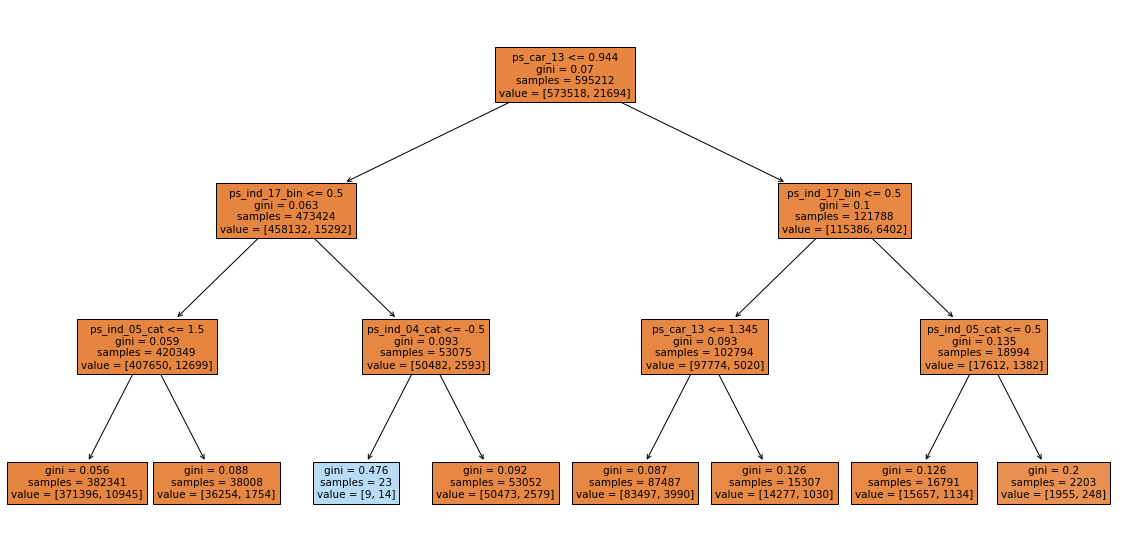

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_features, y_target)

plt.figure(figsize = (20,10))
tree = plot_tree(decision_tree, filled = True, feature_names=X_features.columns)

본문에서는 graphviz를 사용하여 했지만 plot.tree가 더욱 간편하여 위로 대체함

## Feature ipmortane via Gradient Boosting model

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-15-Gradient-Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth = 3, min_samples_leaf= 4, max_features=0.2, random_state= 0)
gb.fit(X_features, y_target)

GradientBoostingClassifier(max_features=0.2, min_samples_leaf=4, random_state=0)

In [43]:
trace = go.Scatter(
    y = gb.feature_importances_,
    x = X_features,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale = 'Portland',
        showscale = True),
    text = X_features
    )

data = [trace]

layout = go.Layout(autosize = True,
                  title = 'Gradient Boosting machine Feature Importance',
                  hovermode = 'closest',
                  xaxis = dict(
                      ticklen = 5,
                      showgrid = False,
                      zeroline = False,
                      showline = False),
                  yaxis = dict(
                      title = 'Feature Importance',
                      showgrid = False,
                      zeroline = False,
                      ticklen = 5,
                      gridwidth =2),
                showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter2010')

KeyboardInterrupt: 

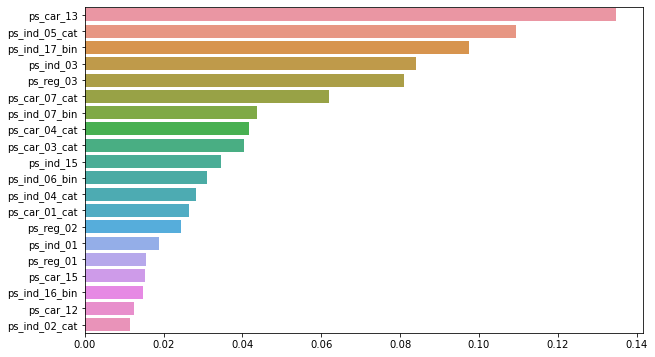

In [49]:
plt.figure(figsize = (10,6))

importance = pd.Series(gb.feature_importances_, index = X_features.columns)
importance = importance.sort_values(ascending = False)[:20]
sns.barplot(x = importance.values, y = importance.index)

plt.show()